# <u>__Day 2: Introduction__ </u>
Today we will focus on use python to do more useful tasks, including: 
- Saving output from python scripts as a (data) file.
- Inputting data in common file formats
- Plotting using popular Python plotting libraries
- Data manipulation and analysis (e.g. basic statistics and non-linear regression) using basic scripts and additional libraries

Below is some general information. Accompanying this are a number of exercises that you can work through.
Accompanying files are found in the `day2` folder. 

**Python vs. R vs. ...**
Before we get started, the following is recommended reading.

https://www.ibm.com/think/topics/python-vs-r


**Reading and writing files**

Note that files contain 3 components:
- Header (metadata): includes file name, type, size, etc
- Data: the contents of the file
- EOF: end of file - a special character that indicates the end of the file.

To open a file we use `open`, a built in function. We also use `close` when we have finished:

We also specify whether we open the file as read-only with the `r` flag (this is default)
or as editable with the `w` (for 'write') flag.

To read the file, we use another function `read`.


In [1]:
readfile = open('file1.txt', 'r') # only file1.text as read-only

print(readfile) # this gives us object information - probably not what we want

print(readfile.read()) # with read() we print the file contents

print(list)

readfile.close()


<_io.TextIOWrapper name='file1.txt' mode='r' encoding='UTF-8'>
column 1, column 2, column 3
1, 1, a
2, 2, b
3, 3, c
4, 4, d
5, 5, e
<class 'list'>


In [2]:
readfile = open('file1.txt', 'r') # only file1.text as read-only

print(readfile.readlines()) # readlines() reads one line at a time; here we return the file contents as a list

readfile.close()


['column 1, column 2, column 3\n', '1, 1, a\n', '2, 2, b\n', '3, 3, c\n', '4, 4, d\n', '5, 5, e']


To write a file, we use `write`:


In [3]:
data = [1,2,3,4]
data = str(data) # convert the list to a string

newfilename = ('file2.txt')
outfile = open(newfilename, 'w') # w means we open this file as editable
outfile.writelines(data)
outfile.close()

**Using pandas**

If we use pandas, it will simply file handling:


In [5]:
# we will install pandas first
!pip install pandas

In [7]:
import pandas as pd

data = pd.read_csv('data.csv',header=0)  # we specify that row 0 (first) is the header (column titles)

print(data[0:5])   # note that I am only plotting the first 5 rows, plus the header

print("The first 5 x values: ")
print(data['x'][0:5])  # as we specified a header, we can call that column using the header title ('x' or 'y' here) 


   x         y
0  1  0.312962
1  2  0.594481
2  3  0.816273
3  4  0.956056
4  5  0.999785
The first 5 x values: 
0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64


**Plotting**

We use `matplotlib` for plotting, and will demonsrate this using the data in 'data.csv'. 

Here's the manual. Use it to have a play...

https://matplotlib.org/stable/index.html


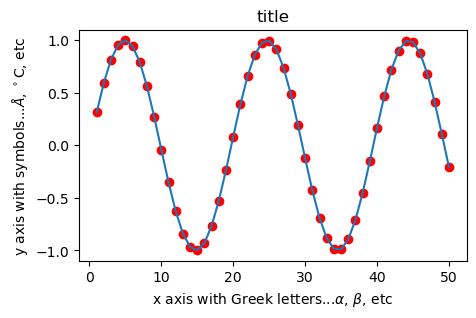

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))                # Set the size of the figure
plt.plot(data['x'], data['y'])            # Choose which data to plot as (x data, y data)
plt.scatter(data['x'], data['y'],c="red") # we have overlaid a scatter plot with a line plot

# Titles and labels
plt.xlabel(r'x axis with Greek letters...$\alpha$, $\beta$, etc') # the `r` command lets use use '$\$' to encode e.g. Greek letters
plt.ylabel(r'y axis with symbols...$\AA$, $^\circ$C, etc')  # uses latex-like handling of (most) symbols
plt.title('title')

# Save your figure (this has to go before plt.show()
plt.savefig("saved_figure.png",bbox_inches="tight", edgecolor=None)

# Show your figure
plt.show()


**Pretty pictures...**

If you are interested in using python to make pretty and/or publication-ready figures, the `matplotlib` tutorial is recommeded:

https://matplotlib.org/stable/tutorials/pyplot.html

Also take a look at `seaborn`.

https://seaborn.pydata.org/

**Regression/fitting**

The data in the csv file was calculated using a sine function. Let's define a custom fitting function and fit the data to determine the frequency.

We will use `numpy` and `scipy` for this.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

`curve_fit` returns:
- popt : an array of optimal values for the fitting parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized
- pcov : a 2d array of the the estimated covariance of popt

**Errors**  
To compute one standard deviation errors on the fitting parameters: 
`errors = np.sqrt(np.diag(pcov))` 



fit values (popt): [ 1.00000000e+00  3.18309886e-01  3.12323788e-10 -1.77898934e-11]
pcov: [[ 3.87393661e-21  2.09288775e-23 -1.89920419e-21 -4.57340508e-22]
 [ 2.09288775e-23  1.70477908e-23 -1.40536427e-21  8.86747044e-24]
 [-1.89920419e-21 -1.40536427e-21  1.51951576e-19 -3.35090080e-22]
 [-4.57340508e-22  8.86747044e-24 -3.35090080e-22  1.91074935e-21]]
errors: [6.22409560e-11 4.12889704e-12 3.89809666e-10 4.37121191e-11]


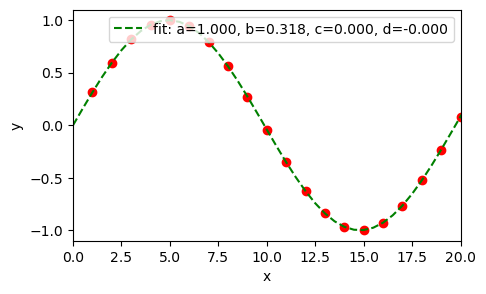

fit: a=1.0000, b=0.3183, c=0.0000, d=-0.0000
errors: a=0.0000, b=0.0000, c=0.0000, d=0.0000


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit

# define a fitting fuction, which is a sine curve with a few extra fitting parameters
def fit(x, a, b, c, d):  
    return a * np.sin(b * (x + c)) + d

xfit = np.linspace(0, 50, num=101)  # linspace used to evenly space 101 points between 0 and 50 (for fit)

guess = [1,1/np.pi,0,0] # initial guesss for the fitting parameters a-d

popt, pcov = curve_fit(fit, data['x'], data['y'], guess)
errors = np.sqrt(np.diag(pcov))

print(f"fit values (popt): {popt}")
print(f"pcov: {pcov}")
print(f"errors: {errors}")

plt.figure(figsize=(5, 3))  
plt.scatter(data['x'], data['y'],c="red")
plt.plot(xfit, fit(xfit, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 20) # Set x-axis
plt.show()

print('fit: a=%5.4f, b=%5.4f, c=%5.4f, d=%5.4f' % tuple(popt))
print('errors: a=%5.4f, b=%5.4f, c=%5.4f, d=%5.4f' % tuple(errors))


**Statistics**

We can do statistics using `numpy`, `scipy` or the `statistics` library (and probably others):

https://docs.python.org/3/library/statistics.html




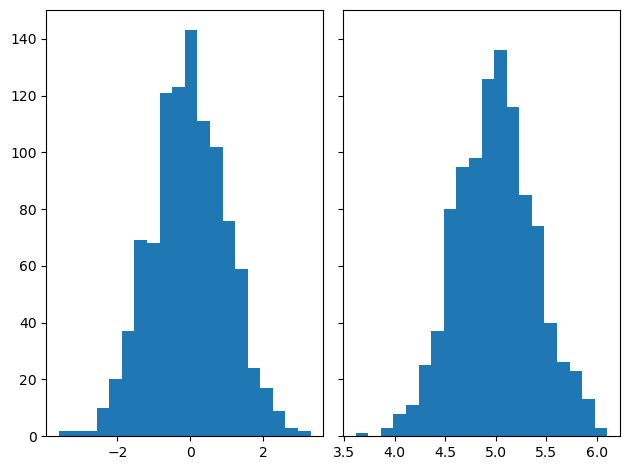

Mean of dist 2:  4.994
One standard deviation of dist 2:  1.030


In [11]:
# from: https://matplotlib.org/stable/gallery/statistics/hist.html

import numpy as np

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

N_points = 1000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

# plot histograms of each distribution
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

plt.show()

# calculate the mean and standard deviation
mean2 = np.mean(dist2)
stdev2 = np.std(dist1)

print(f"Mean of dist 2: {mean2: .3f}")
print(f"One standard deviation of dist 2: {stdev2: .3f}")


**T test, p value, etc**


The function `ttest_ind()` takes two samples of same size and produces a tuple of t-statistic and p-value.


In [12]:
from scipy.stats import ttest_ind

# generate two random samples of the same size (it still works if they are not the same size)
sample1 = np.random.normal(size=100)
sample2 = np.random.normal(size=100)

print(f"mean of samples: {np.mean(sample1): .3f} {np.mean(sample2): .3f}")
print(f"one standard deviation of each sample: {np.std(sample1): .3f} {np.std(sample2): .3f}")

# the ttest_ind calculation and output
result = ttest_ind(sample1, sample2) 

#print(result)
print(f"T statistic: {result.statistic: .5f}")
print(f"p value: {result.pvalue: .5f}")

mean of samples: -0.109  0.048
one standard deviation of each sample:  1.073  0.967
T statistic: -1.08380
p value:  0.27977


Now look in the `day2` folder for examples of code, and supporting data files, to do useful things...